In [1]:
working_directory = '/mnt/DataRAID/melismail/PDAC'
import os
os.chdir(working_directory)
from pickle_utils import write_pickle, read_pickle

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_path = '/mnt/DataRAID/melismail/PDAC/data'
preprocessing_path ='Preprocessing_mask_annotation'
model_path = 'InceptionV3' #ResNet50 #VGG-16

In [3]:
df_dataset = read_pickle(path=os.path.join(base_path, preprocessing_path, model_path, f"{model_path}_celltypes_lbl_df.pkl"))

In [4]:
df_dataset

,Pseudonym,tile_id,lbl_mask,Acinar cells,Alpha cells,B cells,Basal,Beta cells,Classical_CEACAM,Classical_KRT7,...,NK cells,Schwann cells,T cells,iCAF,myCAF_ACTA2,myCAF_POSTN,most_prevalent_cancer,Features,lbl,same
0,IAA2LDX17,"(0, 10)",non-cancer,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Classical_KRT7,"[0.11127892, 0.082550116, 0.013145252, 0.14383...",cancer,False
1,IAA2LDX17,"(0, 11)",non-cancer,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Classical_CEACAM,"[0.088218965, 0.045640353, 0.0048801894, 0.144...",cancer,False
2,IAA2LDX17,"(0, 12)",non-cancer,1.0,0.0,4.0,6.0,1.0,30.0,1.0,...,2.0,2.0,1.0,1.0,2.0,0.0,Classical_CEACAM,"[0.14599374, 0.060965236, 0.00016441147, 0.136...",cancer,False
3,IAA2LDX17,"(0, 13)",non-cancer,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Classical_CEACAM,"[0.16967882, 0.14898822, 0.01608835, 0.1665820...",cancer,False
4,1C73PUTH4,"(1, 2)",non-cancer,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,Basal,"[0.036901504, 0.026912397, 0.0048136557, 0.123...",cancer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977,IEV81RDT6,"(29, 18)",non-cancer,3.0,0.0,4.0,0.0,2.0,1.0,3.0,...,0.0,1.0,1.0,3.0,8.0,0.0,Classical_TFF1,"[0.12156977, 0.05843921, 0.0, 0.08155618, 0.12...",cancer,False
2978,IEV81RDT6,"(29, 19)",non-cancer,2.0,2.0,4.0,0.0,1.0,2.0,2.0,...,0.0,2.0,0.0,1.0,10.0,2.0,Classical_KRT7,"[0.23044428, 0.06414968, 0.038849287, 0.092282...",cancer,False
2979,IEV81RDT6,"(29, 20)",non-cancer,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,Classical_TFF1,"[0.1988481, 0.023601765, 0.0003715857, 0.06648...",cancer,False
2980,IEV81RDT6,"(29, 24)",non-cancer,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,Classical_TFF1,"[0.13010928, 0.07688, 0.003299488, 0.102255315...",cancer,False


In [5]:
features = df_dataset["Features"].to_list()

In [6]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features)
    distortions.append(kmeanModel.inertia_)

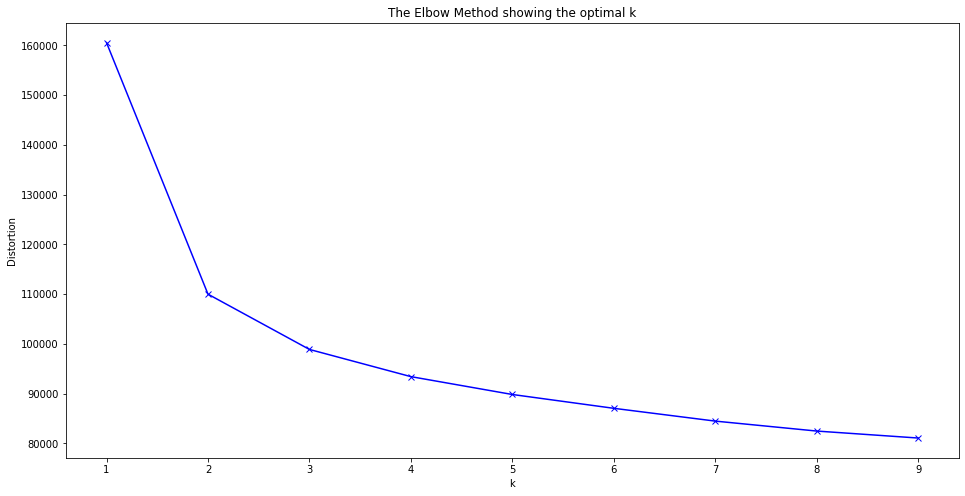

In [7]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
# cluster
k = 2
clusters = KMeans(k, random_state = 42)
clusters_incept = clusters.fit(features)

In [9]:
df_dataset["clusterid"] = clusters.labels_
df_dataset["Patient"] = [x.split("_")[0] for x in df_dataset["Pseudonym"]]
df_dataset

,Pseudonym,tile_id,lbl_mask,Acinar cells,Alpha cells,B cells,Basal,Beta cells,Classical_CEACAM,Classical_KRT7,...,T cells,iCAF,myCAF_ACTA2,myCAF_POSTN,most_prevalent_cancer,Features,lbl,same,clusterid,Patient
0,IAA2LDX17,"(0, 10)",non-cancer,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,Classical_KRT7,"[0.11127892, 0.082550116, 0.013145252, 0.14383...",cancer,False,1,IAA2LDX17
1,IAA2LDX17,"(0, 11)",non-cancer,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,Classical_CEACAM,"[0.088218965, 0.045640353, 0.0048801894, 0.144...",cancer,False,1,IAA2LDX17
2,IAA2LDX17,"(0, 12)",non-cancer,1.0,0.0,4.0,6.0,1.0,30.0,1.0,...,1.0,1.0,2.0,0.0,Classical_CEACAM,"[0.14599374, 0.060965236, 0.00016441147, 0.136...",cancer,False,1,IAA2LDX17
3,IAA2LDX17,"(0, 13)",non-cancer,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Classical_CEACAM,"[0.16967882, 0.14898822, 0.01608835, 0.1665820...",cancer,False,1,IAA2LDX17
4,1C73PUTH4,"(1, 2)",non-cancer,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,Basal,"[0.036901504, 0.026912397, 0.0048136557, 0.123...",cancer,False,1,1C73PUTH4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977,IEV81RDT6,"(29, 18)",non-cancer,3.0,0.0,4.0,0.0,2.0,1.0,3.0,...,1.0,3.0,8.0,0.0,Classical_TFF1,"[0.12156977, 0.05843921, 0.0, 0.08155618, 0.12...",cancer,False,1,IEV81RDT6
2978,IEV81RDT6,"(29, 19)",non-cancer,2.0,2.0,4.0,0.0,1.0,2.0,2.0,...,0.0,1.0,10.0,2.0,Classical_KRT7,"[0.23044428, 0.06414968, 0.038849287, 0.092282...",cancer,False,1,IEV81RDT6
2979,IEV81RDT6,"(29, 20)",non-cancer,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,Classical_TFF1,"[0.1988481, 0.023601765, 0.0003715857, 0.06648...",cancer,False,1,IEV81RDT6
2980,IEV81RDT6,"(29, 24)",non-cancer,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,Classical_TFF1,"[0.13010928, 0.07688, 0.003299488, 0.102255315...",cancer,False,1,IEV81RDT6


In [18]:
df_dataset['clusterid'].unique()
df_dataset.columns
df2=df_dataset.loc[df_dataset['clusterid'] == 0, ['Pseudonym', 'tile_id']]
print(df2)

      Pseudonym   tile_id
11    IQ5WIKH4I    (1, 6)
13    IQ5WIKH4I    (1, 7)
34    1C73PUTH4    (2, 2)
35    1C73PUTH4    (2, 3)
37    1C73PUTH4    (2, 4)
...         ...       ...
2940  IEV81RDT6  (27, 18)
2947  IEV81RDT6   (28, 9)
2948  IEV81RDT6  (28, 10)
2949  IEV81RDT6  (28, 11)
2950  IEV81RDT6  (28, 12)

[2269 rows x 2 columns]


In [11]:
# UMAP projection of feature vectors
reducer = umap.UMAP()
df = pd.DataFrame(features)
embedding = reducer.fit_transform(df)
embedding.shape

(2982, 2)

In [12]:
df_dataset["UMAP1"] =  [embedding[i, 0] for i in range(df_dataset.shape[0])]
df_dataset["UMAP2"] =  [embedding[i, 1] for i in range(df_dataset.shape[0])]

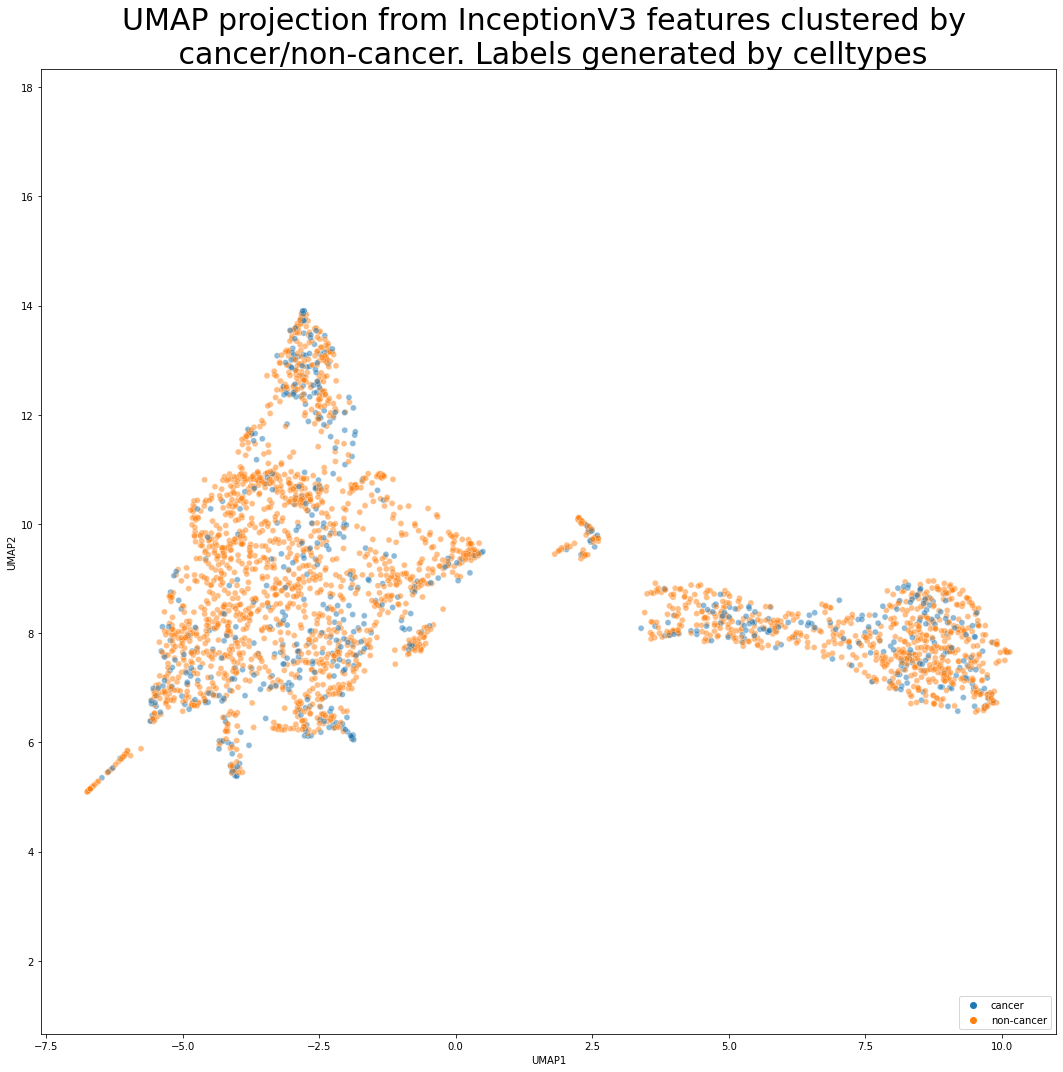

In [13]:
fig = plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_dataset, x="UMAP1", y="UMAP2", hue="lbl", cmap=sns.color_palette(), alpha=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection from InceptionV3 features clustered by \n cancer/non-cancer. Labels generated by celltypes', fontsize=30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('UMAP_InceptionV3_feaftures_two_classes_lbl.png')
plt.show()

In [14]:
df_dataset["UMAP3"] =  [embedding[i, 0] for i in range(df_dataset.shape[0])]
df_dataset["UMAP4"] =  [embedding[i, 1] for i in range(df_dataset.shape[0])]

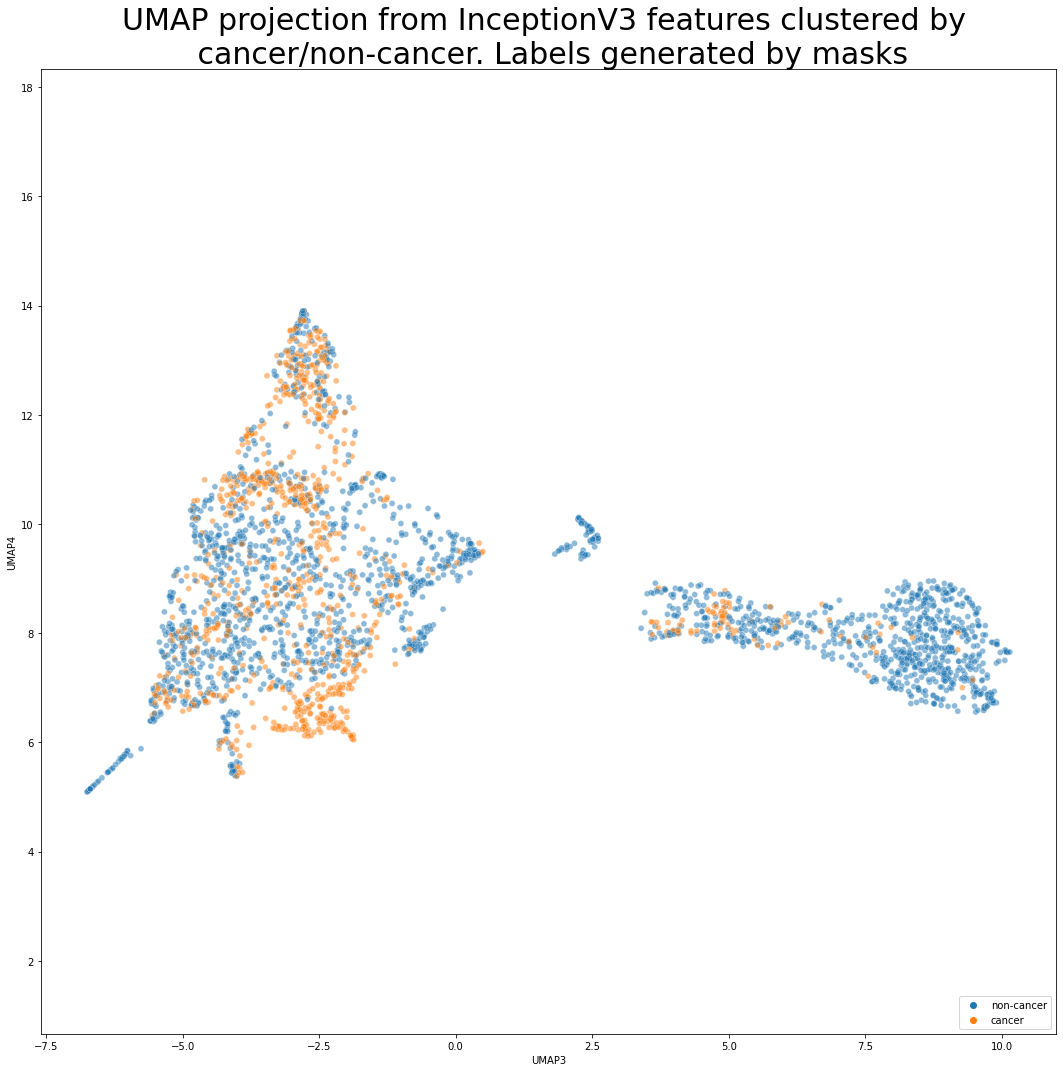

In [15]:
fig = plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_dataset, x="UMAP3", y="UMAP4", hue="lbl_mask", cmap=sns.color_palette(), alpha=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection from InceptionV3 features clustered by \n cancer/non-cancer. Labels generated by masks', fontsize=30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('UMAP_InceptionV3_feaftures_two_classes_lbl_masks.png')
plt.show()

In [16]:
df_dataset["UMAP5"] =  [embedding[i, 0] for i in range(df_dataset.shape[0])]
df_dataset["UMAP6"] =  [embedding[i, 1] for i in range(df_dataset.shape[0])]

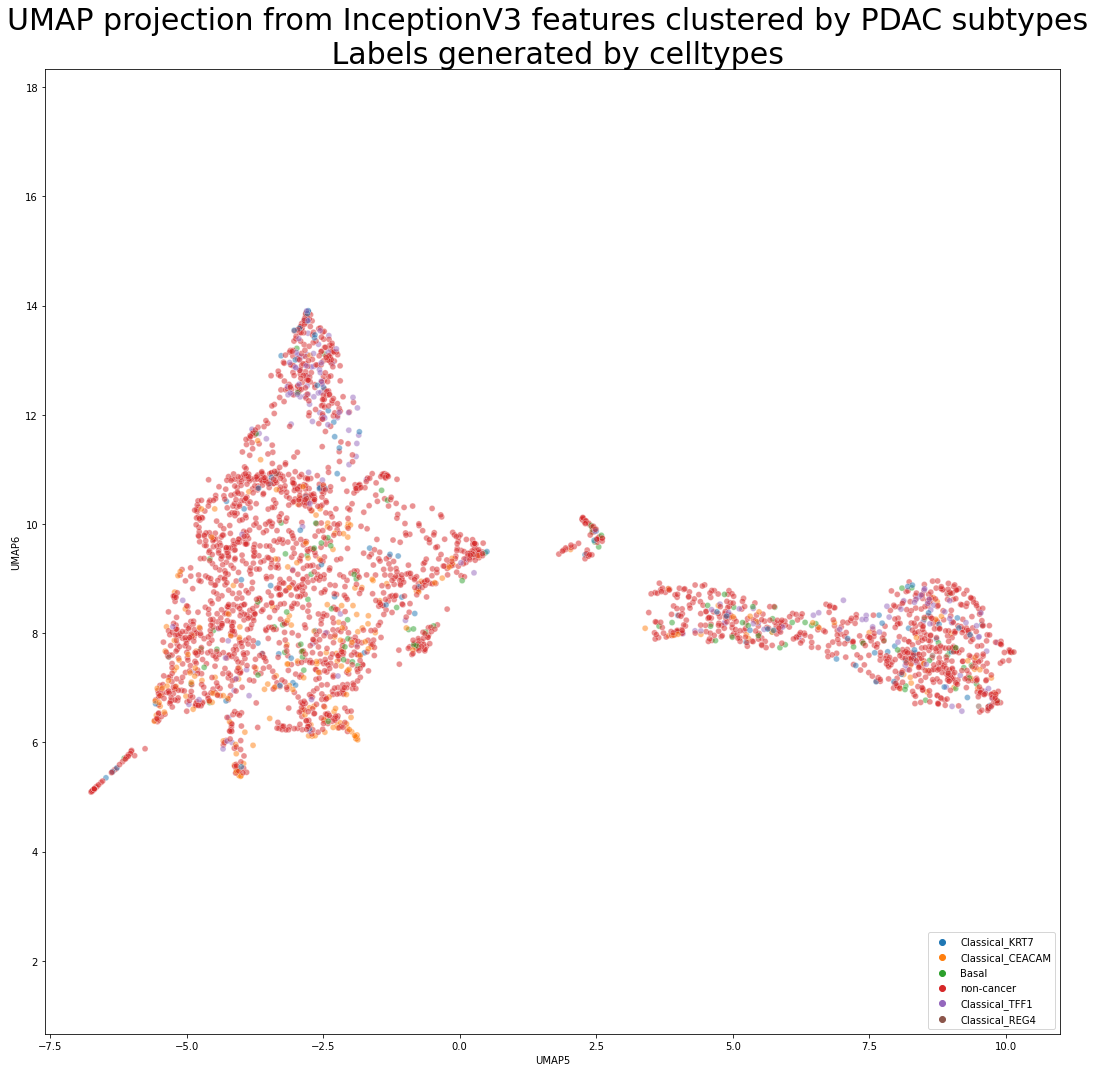

In [17]:
fig = plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_dataset, x="UMAP5", y="UMAP6", hue="most_prevalent_cancer", cmap=sns.color_palette(), alpha=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection from InceptionV3 features clustered by PDAC subtypes \n Labels generated by celltypes', fontsize=30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('UMAP_InceptionV3_feaftures_six_classes_lbl.png')
plt.show()